# AHHHSteroids!!

An interesting look at some NASA data on NEOs (Near Earth Objects), the dinosaurs had a hard time with their NEO observations so we are going to try and improve on that. Not a high benchmark but hopefully we can improve on it! This is a Kaggle data-set so can be obtained from there if you want to have a play and create your own models.

In [6]:
#Numerical manipulation
import pandas as pd
import numpy as np

#Plotting
import matplotlib.pyplot as plt

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [7]:
data = pd.read_csv(r'/Users/christopherbacon/Documents/Python resources/nasa.csv/nasa.csv')

In [8]:
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


As we can see from the head of our data, our 'Hazardous' column describes asteroids that are potentially hazardous to earth. Our goal is to build a model that will help us to predict which asteroid is friend and which is foe. Hopefully avoiding disaster from there.

In [9]:
danger = data.loc[data['Hazardous']]

The next step is to take a look and see if there is any correlation between the any of the individual columns and our hazardous asteroids.

In [10]:
corr = danger.corr(method='pearson')
corr

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.000000,1.000000,0.561032,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,...,0.131903,-0.055572,0.215533,0.110457,-0.007581,0.199703,0.061127,-0.077027,-0.171947,NaN
Name,1.000000,1.000000,0.561032,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,...,0.131903,-0.055572,0.215533,0.110457,-0.007581,0.199703,0.061127,-0.077027,-0.171947,NaN
Absolute Magnitude,0.561032,0.561032,1.000000,-0.871896,-0.871896,-0.871896,-0.871896,-0.871896,-0.871896,-0.871896,...,-0.169509,-0.107292,-0.062723,0.115785,0.026142,-0.089491,0.002830,-0.079271,0.011752,NaN
Est Dia in KM(min),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN
Est Dia in KM(max),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN
Est Dia in M(min),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN
Est Dia in M(max),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN
Est Dia in Miles(min),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN
Est Dia in Miles(max),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN
Est Dia in Feet(min),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN


In [11]:
corr.sort_values(by=['Hazardous']).head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
Neo Reference ID,1.000000,1.000000,0.561032,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,...,0.131903,-0.055572,0.215533,0.110457,-0.007581,0.199703,0.061127,-0.077027,-0.171947,NaN
Name,1.000000,1.000000,0.561032,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,-0.472339,...,0.131903,-0.055572,0.215533,0.110457,-0.007581,0.199703,0.061127,-0.077027,-0.171947,NaN
Absolute Magnitude,0.561032,0.561032,1.000000,-0.871896,-0.871896,-0.871896,-0.871896,-0.871896,-0.871896,-0.871896,...,-0.169509,-0.107292,-0.062723,0.115785,0.026142,-0.089491,0.002830,-0.079271,0.011752,NaN
Est Dia in KM(min),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN
Est Dia in KM(max),-0.472339,-0.472339,-0.871896,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.108730,0.098290,0.045358,-0.106343,-0.007025,0.069058,0.000034,0.084459,0.004168,NaN


We can also take a look at our data more broadly to get a feel for things more quickly.

In [12]:
data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


As we can see from the above, there is seemingly very little correlation between 'hazardous' and any of the other features. Let's now plot some of our features and see what else we can learn. I have chosen four features that could be of interest.

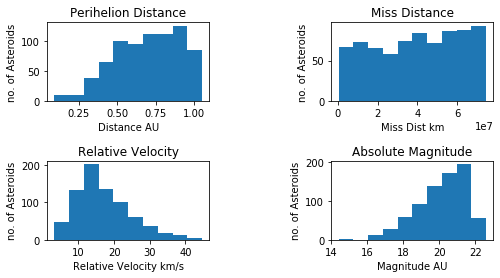

In [13]:
plt.figure(figsize=(8,4))

plt.subplot(2, 2, 1)
plt.hist(danger['Perihelion Distance'])
plt.title('Perihelion Distance')
plt.xlabel('Distance AU')
plt.ylabel('no. of Asteroids')

plt.subplot(2, 2, 2)
plt.hist(danger['Miss Dist.(kilometers)'])
plt.title('Miss Distance')
plt.xlabel('Miss Dist km')
plt.ylabel('no. of Asteroids')

plt.subplot(2, 2, 3)
plt.hist(danger['Relative Velocity km per sec'])
plt.title('Relative Velocity')
plt.xlabel('Relative Velocity km/s')
plt.ylabel('no. of Asteroids')

plt.subplot(2, 2, 4)
plt.hist(danger['Absolute Magnitude'])
plt.title('Absolute Magnitude')
plt.xlabel('Magnitude AU')
plt.ylabel('no. of Asteroids')

plt.subplots_adjust(wspace=0.75, hspace=0.75)

plt.show()

All of our dangerous asteroids come within 1 AU of the sun, which is pretty close, but on the plus side the majority have a high absolute magnitude so we should be able to spot them. Which is essential if any asteroids decide to wander off course and head in our direction. We can also see that majority of the velocities are less than
20 km/s which is good because it makes things easier to track but, there are some outliers that are moving much faster.

Now let's build our model. For this I will use the train, test, split methods. I have removed, Equinox, Epoch Date Close Approach, Orbit Determination Date, Orbiting Body, Close Approach Date. I removed these features as they contain non-numerical fields and also date fields and thus will not help our model.

In [14]:
from sklearn.model_selection import train_test_split

columns = ['Neo Reference ID',
 'Name',
 'Absolute Magnitude',
 'Est Dia in KM(min)',
 'Est Dia in KM(max)',
 'Est Dia in M(min)',
 'Est Dia in M(max)',
 'Est Dia in Miles(min)',
 'Est Dia in Miles(max)',
 'Est Dia in Feet(min)',
 'Est Dia in Feet(max)',
 'Relative Velocity km per sec',
 'Relative Velocity km per hr',
 'Miles per hour',
 'Miss Dist.(Astronomical)',
 'Miss Dist.(lunar)',
 'Miss Dist.(kilometers)',
 'Miss Dist.(miles)',
 'Orbit ID',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant',
 'Epoch Osculation',
 'Eccentricity',
 'Semi Major Axis',
 'Inclination',
 'Asc Node Longitude',
 'Orbital Period',
 'Perihelion Distance',
 'Perihelion Arg',
 'Aphelion Dist',
 'Perihelion Time',
 'Mean Anomaly',
 'Mean Motion']

all_X = data[columns]
all_y = data['Hazardous']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2,random_state=0)

In [15]:
train_X.shape

(3749, 34)

Now we can check the accuracy of our model and see whether we are on the right lines. Sci-kit Learn has a useful function to test the accuracy of the model.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [18]:
accuracy = accuracy_score(test_y, predictions)

In [19]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
accuracy

0.835820895522388

Our model has an 84% accuracy rating after being tested against the 20% of the data. There is a danger this model is overfitting on such a small selection of data. We can use k-fold cross validation for a more accurate measurement.

In [20]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(lr, all_X, all_y, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.82340426 0.82553191 0.84008529 0.81449893 0.8315565  0.83119658
 0.82692308 0.83333333 0.83974359 0.83760684]
Mean: 0.830388031396288
Standard Deviation: 0.0076235990506990075


Our model accuracy has decreased only slightly which isn't too bad. We used cross validation with 10 folds in the data to help improve on the overfitting.

Now let's apply our model to our test data and see what we come up with. Hopefully we will successfully predict which asteroids are hazardous to a high degree of accuracy.

In [21]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(all_X, all_y)
test_predictions = lr.predict(test_X)
test_predictions

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Now we can evaluate how well our model has performed which is important if we are to trust it. Luckily for us we have some methods to do this.

In [22]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(lr, train_X, train_y, cv=10)
confusion_matrix(train_y, predictions)

array([[3089,   50],
       [ 582,   28]])

The first row is non-hazardous asteroids, 3089 were correctly labelled but 50 were incorrectly labelled and were actually hazardous asteroids!

The second row is hazardous asteroids, 582 were classified as non-hazardous incorrectly whereas 28 were correctly predicted as hazardous.

This doesn't seem like a very good model!

In [23]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(train_y, predictions))
print("Recall:", recall_score(train_y, predictions))

Precision: 0.358974358974359
Recall: 0.04590163934426229


As we can see, our percision and recall score are very low. 36% and 5% respectively.

In [24]:
from sklearn.metrics import f1_score
f1_score(train_y, predictions)

0.08139534883720931

Our F score which is the computed harmonic mean of precision and recall comes out at 8% which is not great.

So what next? Is there any way to improve our score? Well, we shouldn't lose hope as there are a number of other models we can try. So let's do that now...

In [25]:
# Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(train_X, train_y)
Y_pred = sgd.predict(test_X)

sgd.score(train_X, train_y)


0.8375566817818085

In [26]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_X, train_y)

Y_prediction = random_forest.predict(test_X)

random_forest.score(train_X, train_y)

1.0

In [27]:
#Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(train_X, train_y) 
Y_pred = gaussian.predict(test_X)

gaussian.score(train_X, train_y)


0.7684715924246466

In [28]:
#Perceptron
perceptron = Perceptron(max_iter=5, tol=None)
perceptron.fit(train_X, train_y)

Y_pred = perceptron.predict(test_X)

perceptron.score(train_X, train_y)

0.7807415310749534

In [42]:
#Linear Support Vector Machine
linear_svc = LinearSVC(max_iter=10)
linear_svc.fit(train_X, train_y)

Y_pred = linear_svc.predict(test_X)

linear_svc.score(train_X, train_y)

/Users/christopherbacon/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7823419578554281

This is interesting as our LSVM has not converged, as we increase the number of iterations the score gets significantly worse. This method is ill suited to our analysis and required further investigation.

In [43]:
#Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(train_X, train_y)  
Y_pred = decision_tree.predict(test_X)  

decision_tree.score(train_X, train_y)

1.0

As you can see from the above Random Forest and Decision Tree performed perfectly. This seems to good to be true so we can use K-Folds cross validation again to check. Let's pick Random Forest and see how it performs:

In [31]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver='lbfgs')
scores = cross_val_score(random_forest, all_X, all_y, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99148936 0.99787234 0.99147122 0.98720682 0.9978678  0.9957265
 0.9957265  0.9957265  1.         1.        ]
Mean: 0.9953087031524632
Standard Deviation: 0.00390660414944536


There we go, the model has been improved and this now seems more realistic but may still be over-fitting. It is very good so hopefully now we will be able to predict dangerous asteroids much more accurately and quickly.The next stage would be to test on more data and refine further, maybe tune some of the model parameters.

Acknowledgements:

Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#linear-regression

https://www.kaggle.com/sashr07/kaggle-titanic-tutorial

https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6